In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\Kavya\OneDrive\Documents\Data sets\spotifydata.csv")

In [3]:
df.head(10)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4
5,5,Chris Smither,What They Say,24NvptbNKGs6sPy1Vh1O0v,48,2012,acoustic,0.566,0.570,2,-6.420,1,0.0329,0.6880,0.000002,0.0943,0.960,83.403,166240,4
6,6,Matt Wertz,Walking in a Winter Wonderland,0BP7hSvLAG3URGrEvNNbGM,48,2012,acoustic,0.575,0.606,9,-8.197,1,0.0300,0.0119,0.000000,0.0675,0.364,121.083,152307,4
7,7,Green River Ordinance,Dancing Shoes,3Y6BuzQCg9p4yH347Nn8OW,45,2012,acoustic,0.586,0.423,7,-7.459,1,0.0261,0.2520,0.000006,0.0976,0.318,138.133,232373,4
8,8,Jason Mraz,Living in the Moment,3ce7k1L4EkZppZPz1EJWTS,44,2012,acoustic,0.650,0.628,7,-7.160,1,0.0232,0.0483,0.000000,0.1190,0.700,84.141,235080,4
9,9,Boyce Avenue,Heaven,2EKxmYmUdAVXlaHCnnW13o,58,2012,acoustic,0.619,0.280,8,-10.238,0,0.0317,0.7300,0.000000,0.1030,0.292,129.948,250063,4


In [4]:
df.shape

(1048575, 20)

In [5]:
df.columns.tolist()

['Unnamed: 0',
 'artist_name',
 'track_name',
 'track_id',
 'popularity',
 'year',
 'genre',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1048575 non-null  int64  
 1   artist_name       1048560 non-null  object 
 2   track_name        1048574 non-null  object 
 3   track_id          1048575 non-null  object 
 4   popularity        1048575 non-null  int64  
 5   year              1048575 non-null  int64  
 6   genre             1048575 non-null  object 
 7   danceability      1048575 non-null  float64
 8   energy            1048575 non-null  float64
 9   key               1048575 non-null  int64  
 10  loudness          1048575 non-null  float64
 11  mode              1048575 non-null  int64  
 12  speechiness       1048575 non-null  float64
 13  acousticness      1048575 non-null  float64
 14  instrumentalness  1048575 non-null  float64
 15  liveness          1048575 non-null  float64
 16  

In [7]:
df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.820514e+05,1.874687e+01,2.012135e+03,5.377796e-01,6.387387e-01,5.286472e+00,-9.001836e+00,6.337620e-01,9.306985e-02,3.216099e-01,2.518109e-01,2.224674e-01,4.542687e-01,1.213105e+02,2.479807e+05,3.886117e+00
std,3.755241e+05,1.607041e+01,7.128070e+00,1.845742e-01,2.707980e-01,3.556115e+00,5.710919e+00,4.817758e-01,1.269212e-01,3.547914e-01,3.649522e-01,2.004279e-01,2.682246e-01,2.978620e+01,1.446411e+05,4.672870e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.609800e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.621435e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.520000e-01,2.000000e+00,-1.084400e+01,0.000000e+00,3.720000e-02,6.570000e-03,1.050000e-06,9.790000e-02,2.250000e-01,9.863750e+01,1.803915e+05,4.000000e+00
50%,5.242870e+05,1.600000e+01,2.013000e+03,5.510000e-01,6.920000e-01,5.000000e+00,-7.463000e+00,1.000000e+00,5.070000e-02,1.480000e-01,1.730000e-03,1.340000e-01,4.360000e-01,1.216590e+02,2.248270e+05,4.000000e+00
75%,9.088995e+05,2.900000e+01,2.018000e+03,6.780000e-01,8.720000e-01,8.000000e+00,-5.285000e+00,1.000000e+00,8.930000e-02,6.390000e-01,6.110000e-01,2.910000e-01,6.720000e-01,1.398900e+02,2.851730e+05,4.000000e+00
max,1.298749e+06,1.000000e+02,2.023000e+03,9.920000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.498980e+02,6.000495e+06,5.000000e+00


In [8]:
df.isnull().sum()

Unnamed: 0           0
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [9]:
df = df.drop_duplicates()
df = df.dropna()
df = df.drop(['Unnamed: 0', 'artist_name', 'track_name', 'track_id'], axis=1)

In [10]:
def rule_based_skip(row):
    score = 0
    
    # Audio feature rules
    if row['danceability'] < 0.4:
        score += 1
    if row['energy'] < 0.4:
        score += 1
    if row['speechiness'] > 0.5:
        score += 1
    if row['valence'] < 0.3:
        score += 1
    if row['instrumentalness'] > 0.7:
        score += 1
    if row['duration_ms'] < 90000 or row['duration_ms'] > 300000:
        score += 1

    # Popularity-based rule
    if row['popularity'] < 40:
        score += 1
    elif row['popularity'] > 70:
        score -= 1

    return 1 if score > 0 else 0

In [11]:
#  Create the 'skipped' column
df['skipped'] = df.apply(rule_based_skip, axis=1)

In [12]:
df['skipped'].value_counts()

skipped
1    978611
0     69948
Name: count, dtype: int64

In [13]:
df.isnull().sum()

popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
skipped             0
dtype: int64

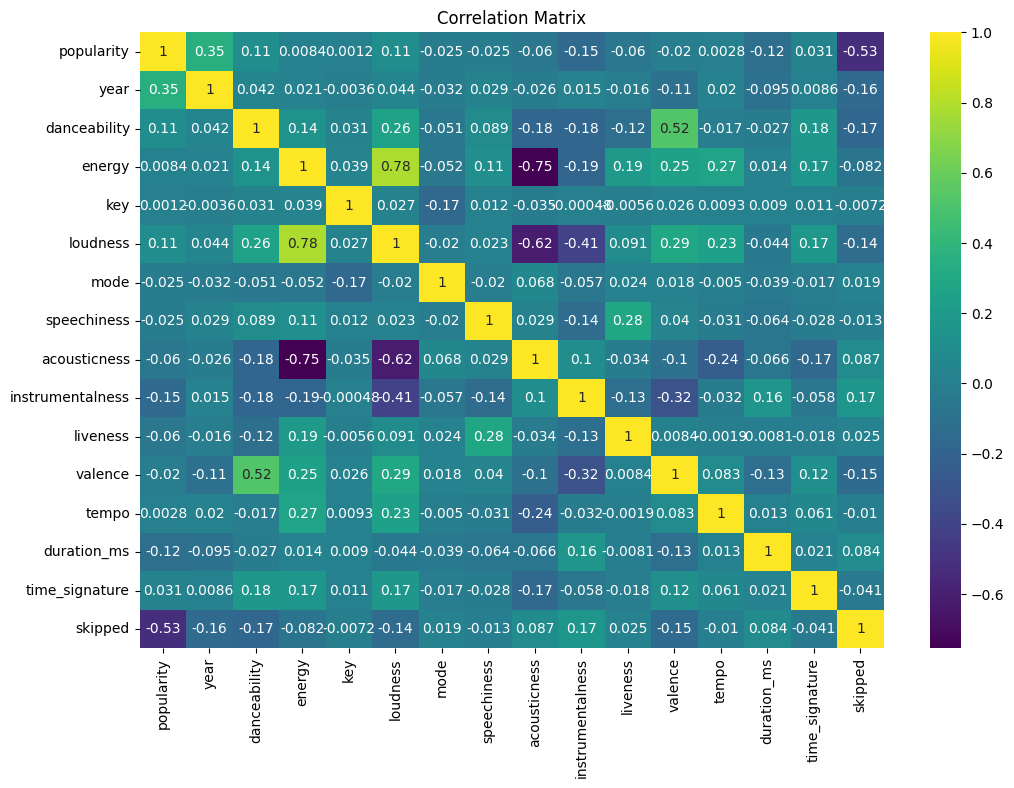

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

In [15]:
df

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,skipped
0,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.69400,0.000000,0.1150,0.139,133.406,240166,3,1
1,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.47700,0.000014,0.0974,0.515,140.182,216387,4,0
2,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.33800,0.000050,0.0895,0.145,139.832,158960,4,1
3,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.80700,0.000000,0.0797,0.508,204.961,304293,4,1
4,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.07260,0.019300,0.1100,0.217,171.864,244320,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,2009,indian,0.419,0.748,2,-10.657,1,0.1940,0.67400,0.000022,0.0800,0.827,171.229,873027,4,1
1048571,13,2009,indian,0.576,0.787,2,-6.503,1,0.0459,0.00313,0.000621,0.3780,0.593,112.010,348475,4,1
1048572,0,2009,indian,0.534,0.314,4,-13.593,1,0.0533,0.95100,0.762000,0.2890,0.490,138.522,1582187,4,1
1048573,0,2009,indian,0.494,0.319,4,-14.487,0,0.0536,0.95800,0.784000,0.1010,0.398,150.335,801213,3,1


In [16]:
num_data = df.select_dtypes(include = "number")
cat_data = df.select_dtypes(include = "object")

# Identify categorical and numerical columns
num_cols = num_data.columns.tolist()
cat_cols = cat_data.columns.tolist()

print("numerical columns: ", num_cols)
print("categorical columns: ",cat_cols)

numerical columns:  ['popularity', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'skipped']
categorical columns:  ['genre']


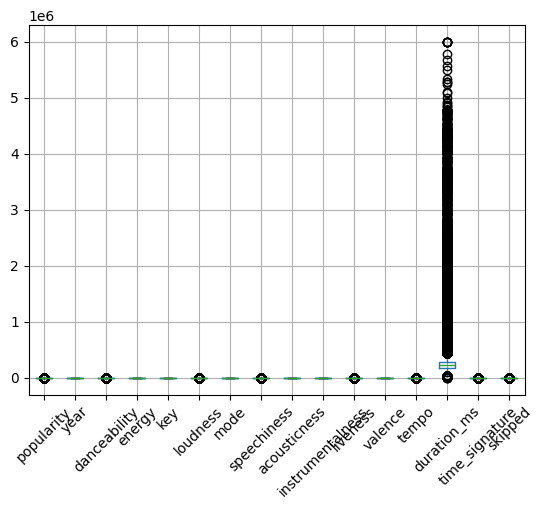

In [17]:
# Perform an outlier detection analysis on numerical variables (e.g., using the IQR method).
num_data.boxplot()
plt.xticks(rotation=45)
plt.show()

In [18]:
def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data[column_name] = data[column_name].clip(upper = upper_bound)
    data[column_name] = data[column_name].clip(lower = lower_bound)
    return data[column_name]

In [19]:
for col in num_cols:
      num_data[col] = remove_outliers(num_data, col)

In [20]:
df.isnull().sum()

popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
skipped             0
dtype: int64

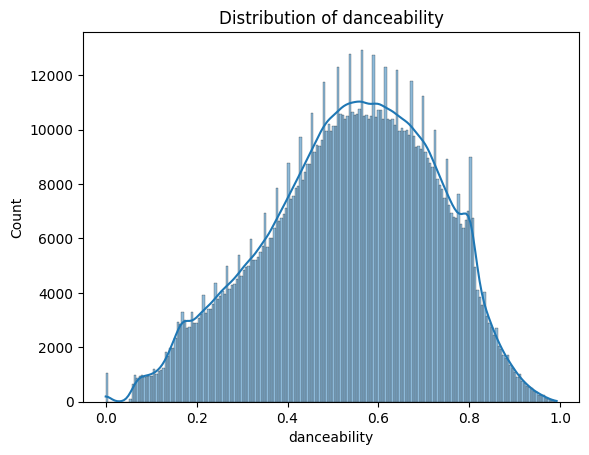

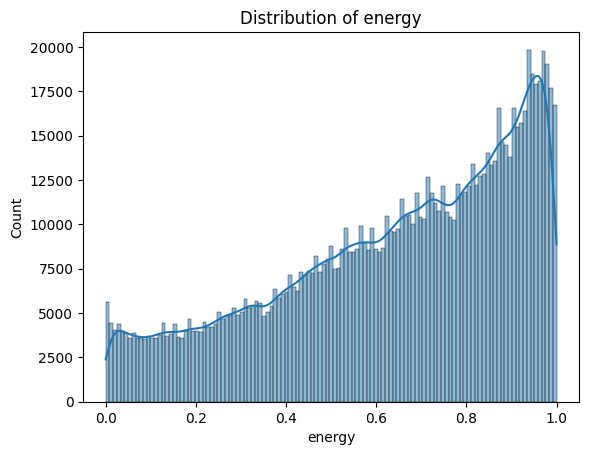

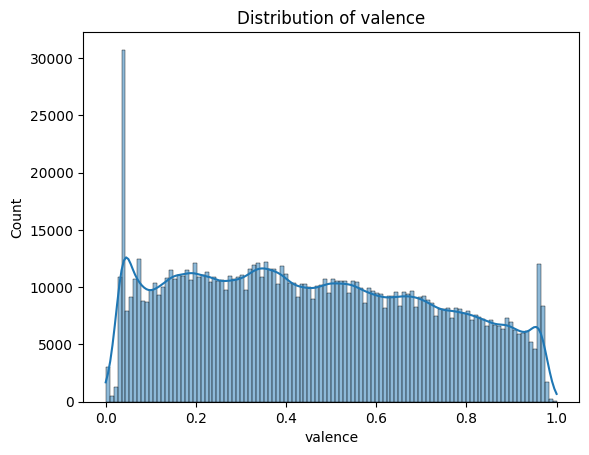

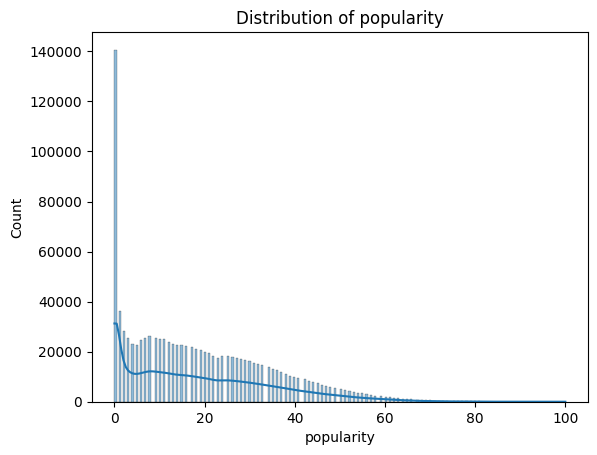

In [21]:
#Distribution plot of a few features
features_to_plot = ['danceability', 'energy', 'valence', 'popularity']
for col in features_to_plot:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

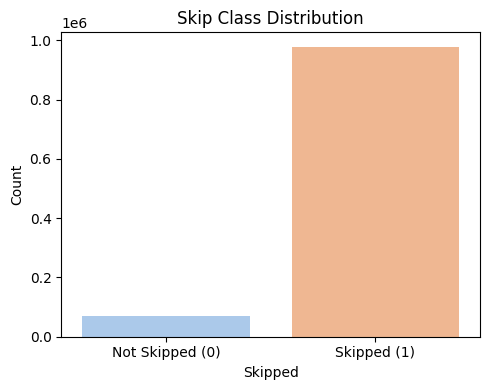

In [22]:
#Skip Class Distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='skipped', hue='skipped', data=df, palette='pastel', legend=False)
plt.title('Skip Class Distribution')
plt.xlabel('Skipped')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Skipped (0)', 'Skipped (1)'])
plt.tight_layout()
plt.show()

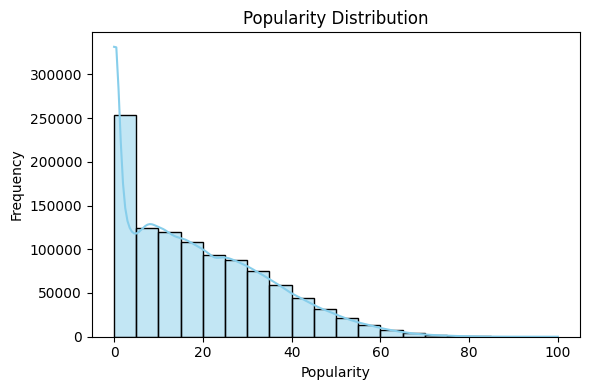

In [23]:
# Popularity Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['popularity'], kde=True, bins=20, color='skyblue')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

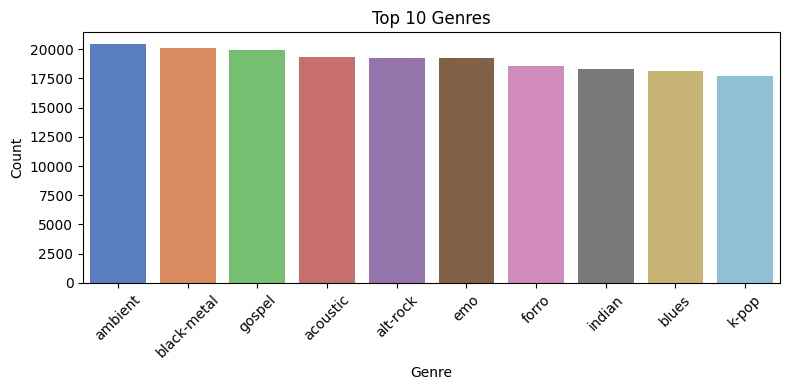

In [24]:
top_genres = df["genre"].value_counts().nlargest(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_genres.index, y=top_genres.values, hue=top_genres.index, palette='muted', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Genres")
plt.ylabel("Count")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

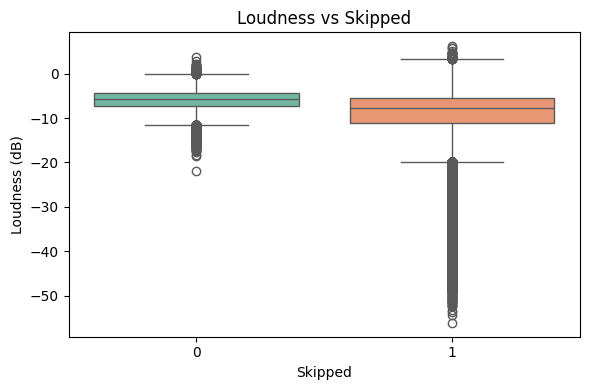

In [25]:
# Boxplot: Loudness by Skip Class
plt.figure(figsize=(6, 4))
sns.boxplot(x='skipped', y='loudness', hue='skipped', data=df, palette='Set2', legend=False)
plt.title('Loudness vs Skipped')
plt.xlabel('Skipped')
plt.ylabel('Loudness (dB)')
plt.tight_layout()
plt.show()

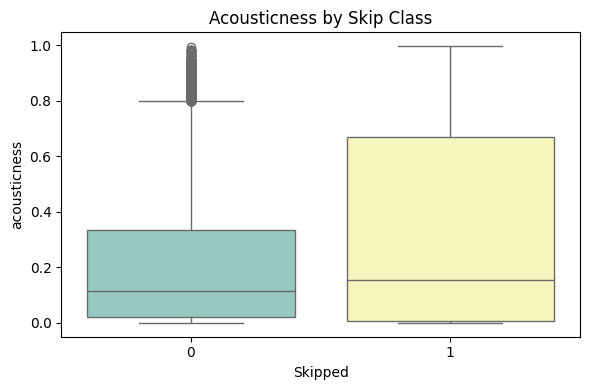

In [26]:
# Boxplot: Acousticness by Skip Class
plt.figure(figsize=(6, 4))
sns.boxplot(x='skipped', y='acousticness', hue='skipped', data=df, palette='Set3',legend=False)
plt.title('Acousticness by Skip Class')
plt.xlabel('Skipped')
plt.tight_layout()
plt.show()

In [27]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [28]:
# Select features
selected_features = [
    "danceability", "genre", "energy", "speechiness", "valence",
    "instrumentalness", "duration_ms", "popularity"
]
X = df[selected_features].copy()
y = df["skipped"]

# Preprocessing
num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(include="object").columns.tolist()

imputer_num = SimpleImputer(strategy="mean")
X[num_cols] = imputer_num.fit_transform(X[num_cols])

imputer_cat = SimpleImputer(strategy="most_frequent")
X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])

encoder = LabelEncoder()
for col in cat_cols:
    X[col] = encoder.fit_transform(X[col].astype(str))

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [29]:
# Apply SMOTE to handle imbalance
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)


In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [32]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [100, 150],
    "max_depth": [10, 15],
    "min_samples_split": [2, 5],
    "class_weight": ["balanced"]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=4,               # Try 4 random combinations
    cv=3,
    scoring="f1",
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
rf_model = random_search.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [36]:
rf_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("Best Parameters:", random_search.best_params_)


[[195926     27]
 [     5 195487]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    195953
           1       1.00      1.00      1.00    195492

    accuracy                           1.00    391445
   macro avg       1.00      1.00      1.00    391445
weighted avg       1.00      1.00      1.00    391445

Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 15, 'class_weight': 'balanced'}


In [37]:
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


Training Logistic Regression...


In [38]:
print("Training XGBoost...")
xgb_model = XGBClassifier(
    scale_pos_weight=(len(y_train) / sum(y_train)),
    eval_metric='logloss',
    n_estimators=100,
    max_depth=3,
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

Training XGBoost...


In [39]:
models = {
    "Logistic Regression": (lr_model, lr_pred),
    "XGBoost": (xgb_model, xgb_pred),
    "Random Forest": (rf_model, rf_pred)
}

model_scores = {}

for name, (model, pred) in models.items():
    accuracy = accuracy_score(y_test, pred)
    model_scores[name] = accuracy
    print(f"\n{name} Accuracy: {round(accuracy, 4)}")
    print("Precision:", round(precision_score(y_test, pred), 4))
    print("Recall:", round(recall_score(y_test, pred), 4))
    print("F1 Score:", round(f1_score(y_test, pred), 4))


Logistic Regression Accuracy: 0.9636
Precision: 0.9832
Recall: 0.9432
F1 Score: 0.9628

XGBoost Accuracy: 0.9993
Precision: 0.9993
Recall: 0.9992
F1 Score: 0.9993

Random Forest Accuracy: 0.9999
Precision: 0.9999
Recall: 1.0
F1 Score: 0.9999


In [40]:
import pickle
from sklearn.model_selection import cross_val_score

In [41]:
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name][0]

print(f"\n Best Model: {best_model_name} with Accuracy: {model_scores[best_model_name]:.4f}")

# Retrieve final model from best_models dict
final_model = models[best_model_name][0]

#  5-fold cross-validation
cv_scores = cross_val_score(final_model, X_scaled, y, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

print("Train Accuracy:", final_model.score(X_train, y_train))
print("Test Accuracy:", final_model.score(X_test, y_test))

#  Save final model
with open("best_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

#  Save encoder (if used)
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

#  Save feature column names
with open("model_features.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)    

print(" Final model, encoder, and feature names saved successfully.")


 Best Model: Random Forest with Accuracy: 0.9999
Cross-Validation Scores: [0.99994278 0.99991417 0.99994755 0.99995232 0.99998569]
Mean CV Accuracy: 0.9999485007874558
Standard Deviation: 2.28487390465733e-05
Train Accuracy: 0.9999885041101
Test Accuracy: 0.9999182516062282
 Final model, encoder, and feature names saved successfully.


##### 